<a href="https://colab.research.google.com/github/Happday-bot/Quantum-Computing-Projects/blob/main/Grover's_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install pylatexenc

In [ ]:
# Built-in modules
import math

# Imports from Qiskit
from qiskit import QuantumCircuit
from qiskit.circuit.library import grover_operator, MCMTGate, ZGate
from qiskit.visualization import plot_distribution
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Imports from Qiskit Runtime
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler

def grover_oracle(marked_states):
    """Build a Grover oracle for multiple marked states

    Here we assume all input marked states have the same number of bits

    Parameters:
        marked_states (str or list): Marked states of oracle

    Returns:
        QuantumCircuit: Quantum circuit representing Grover oracle
    """
    if not isinstance(marked_states, list):
        marked_states = [marked_states]
    # Compute the number of qubits in circuit
    num_qubits = len(marked_states[0])

    qc = QuantumCircuit(num_qubits)
    for target in marked_states:
        rev_target = target[::-1]
        zero_inds = [ ind for ind in range(num_qubits) if rev_target.startswith("0", ind) ]
        print(zero_inds)
        if zero_inds:
            qc.x(zero_inds)
        qc.compose(MCMTGate(ZGate(), num_qubits - 1, 1), inplace=True)
        if zero_inds:
            qc.x(zero_inds)
    return qc

In [ ]:
QiskitRuntimeService.save_account(
    channel="ibm_quantum_platform",
    token="pFRfKvzkesIpK89JviLkSARUt6PoT3yx8qjfx5laQexj",
    instance="crn:v1:bluemix:public:quantum-computing:us-east:a/c73e2483ca6c4a5995984f5513ce9a13:ba838cc7-414e-46e8-98fa-3ab37fcaed91::",
    overwrite=True
    )

'ibm_brisbane'

In [ ]:
service = QiskitRuntimeService()
backend = service.least_busy(
    operational=True, simulator=False, min_num_qubits=127
)
backend.name

'ibm_brisbane'

In [ ]:
grover_oracle(["011", "100"])

[2]
[0, 1]


[2]
[0, 1]
[0, 1, 2]


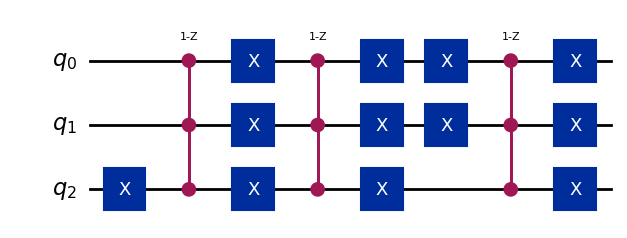

In [ ]:
marked_states = ["011", "100","000"]

oracle = grover_oracle(marked_states)
oracle.draw(output="mpl", style="iqp")

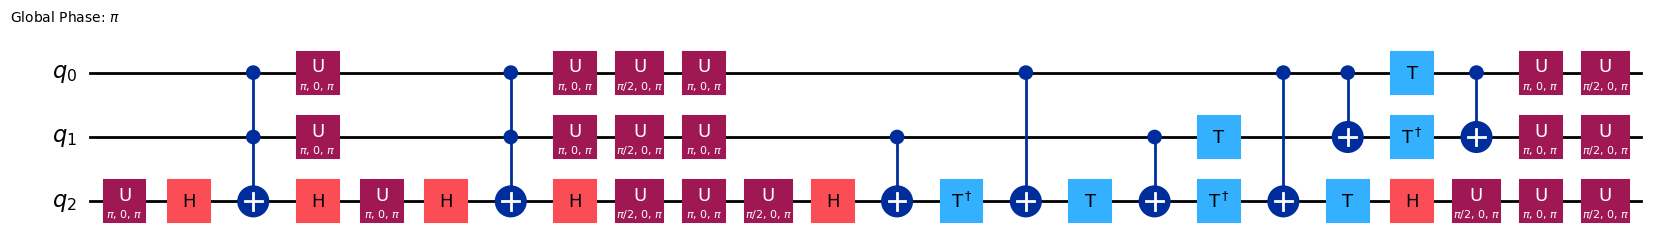

In [ ]:
grover_op = grover_operator(oracle)
grover_op.decompose().draw(output="mpl", style="iqp")

In [ ]:
optimal_num_iterations = math.floor(
    math.pi
    / (4 * math.asin(math.sqrt(len(marked_states) / 2**grover_op.num_qubits)))
)

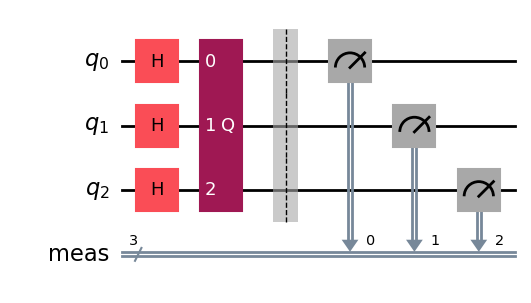

In [ ]:
qc = QuantumCircuit(grover_op.num_qubits)
# Create even superposition of all basis states
qc.h(range(grover_op.num_qubits))
# Apply Grover operator the optimal number of times
qc.compose(grover_op.power(optimal_num_iterations), inplace=True)
# Measure all qubits
qc.measure_all()
qc.draw(output="mpl", style="iqp")

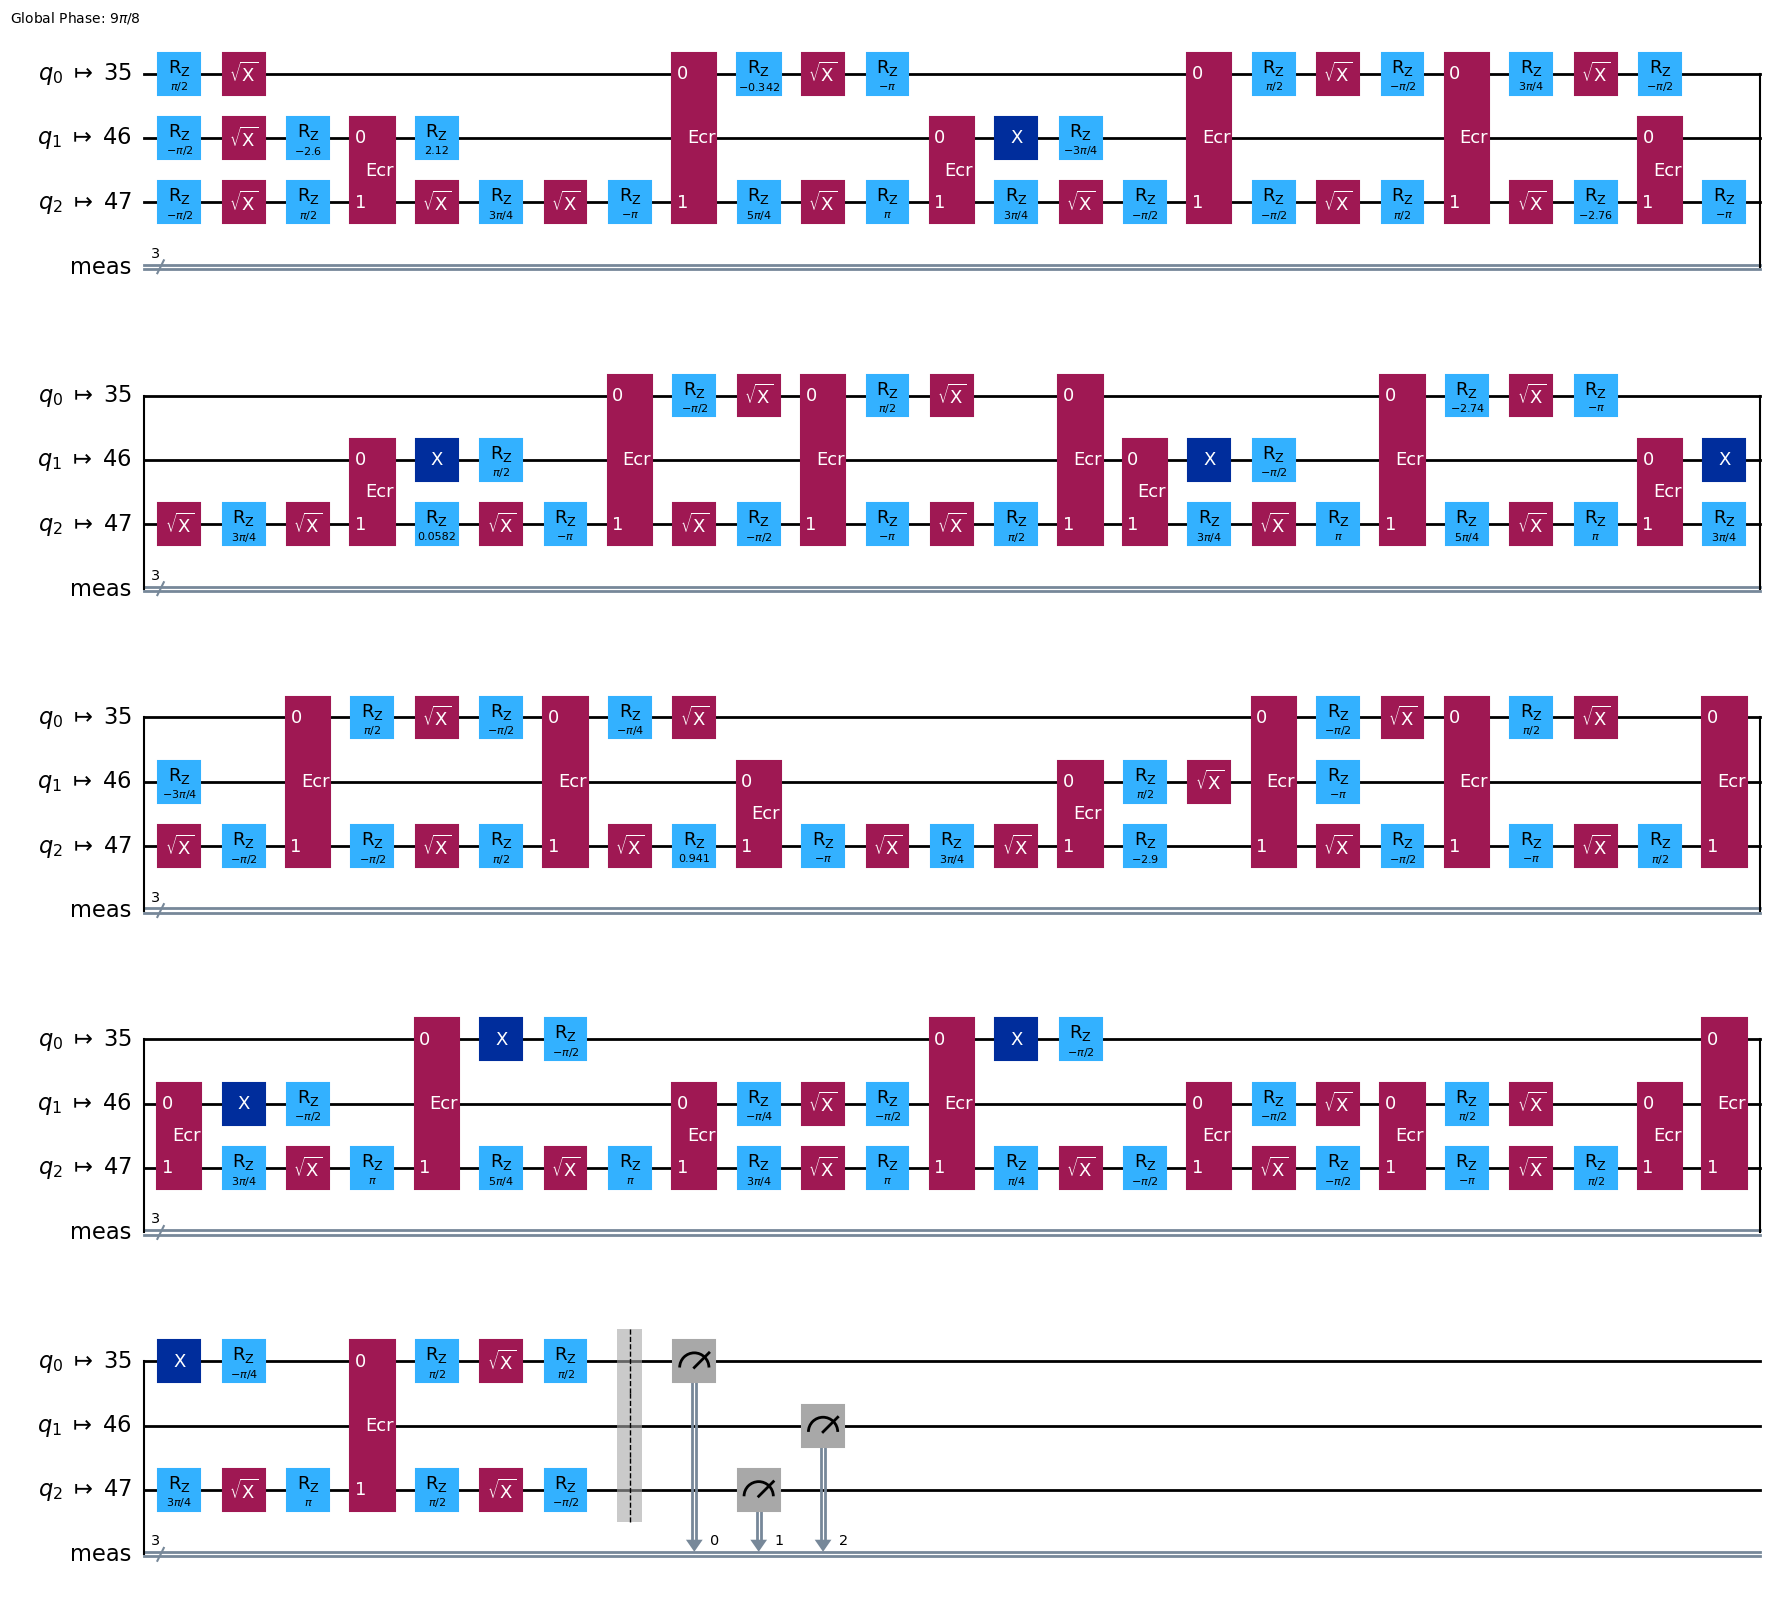

In [ ]:
target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

circuit_isa = pm.run(qc)
circuit_isa.draw(output="mpl", idle_wires=False, style="iqp")

In [ ]:
# To run on local simulator:
#   1. Use the StatevectorSampler from qiskit.primitives instead
sampler = Sampler(mode=backend)
sampler.options.default_shots = 10_000
result = sampler.run([circuit_isa]).result()
dist = result[0].data.meas.get_counts()

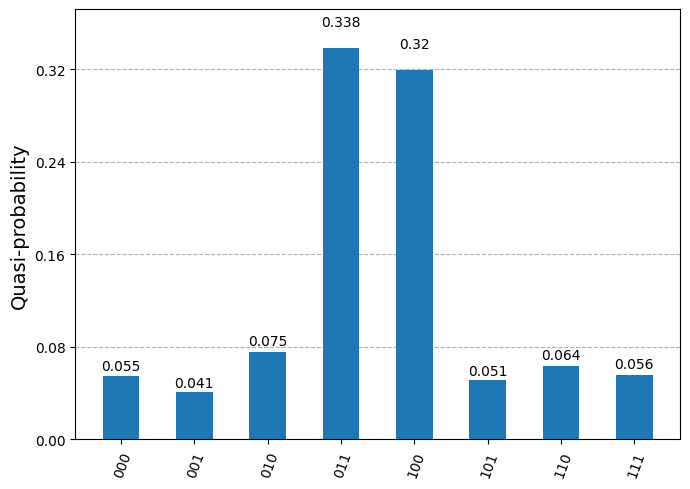

In [ ]:
plot_distribution(dist)

# **What if i have to search a extra outcome in the qubit space:?**

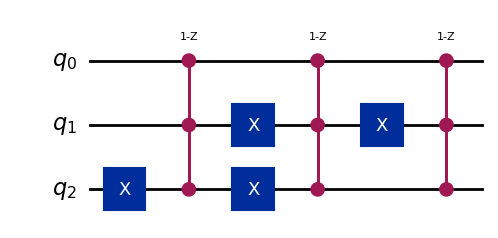

In [ ]:
marked_states = ["011", "101","111"]

oracle = grover_oracle(marked_states)
oracle.draw(output="mpl", style="iqp")

In [ ]:
grover_op = grover_operator(oracle)
optimal_num_iterations = math.floor(
    math.pi
    / (4 * math.asin(math.sqrt(len(marked_states) / 2**grover_op.num_qubits)))
)
qc = QuantumCircuit(grover_op.num_qubits)
# Create even superposition of all basis states
qc.h(range(grover_op.num_qubits))
# Apply Grover operator the optimal number of times
qc.compose(grover_op.power(optimal_num_iterations), inplace=True)
# Measure all qubits
qc.measure_all()

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

circuit_isa = pm.run(qc)

# To run on local simulator:
#   1. Use the StatevectorSampler from qiskit.primitives instead
sampler = Sampler(mode=backend)
sampler.options.default_shots = 10_000
result = sampler.run([circuit_isa]).result()
dist = result[0].data.meas.get_counts()

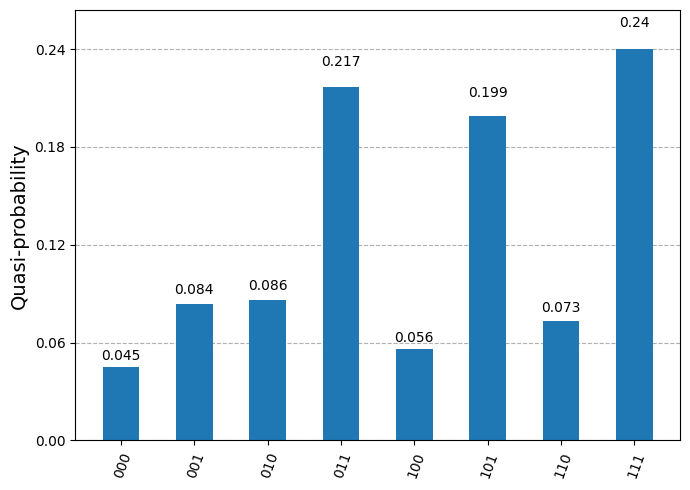

In [ ]:
plot_distribution(dist)